# **BİTİRME PROJESİ:**

- **ANALİZ 1:** Siparişler ortalama ne kadar tuttu?

- **ANALİZ 2:** Eyaletlere göre yapılan siparişlerin ortalama ödemeleri

- **ANALİZ 3:** Ödeme Şekline Göre Yapılan Ödemelerin Ortalamaları

- **ANALİZ 4:** Ödenen Ücret İle Kargo ücreti arasındaki oran

- **BONUS :** Aykırı gözlemleri silip, ortalama değeri ile doldurmak.

In [27]:
import pandas as pd
import seaborn as sns

In [5]:
def ozellik_func(dataframe, head = 5):
   
    #boyut
    print("------------------------------------------SHAPE------------------------------------------")
    print(dataframe.shape)
    
    #tip
    print("------------------------------------------TYPE-------------------------------------------")
    print(dataframe.dtypes)
    
    #İlk gözlemler
    print("------------------------------------------HEAD-------------------------------------------")
    print(dataframe.head(head))
    
    #Son gözlemler
    print("------------------------------------------TAIL-------------------------------------------")
    print(dataframe.tail(head))
    
    #Eksik gözlem sayısı
    print("------------------------------------------NA---------------------------------------------")
    print(dataframe.isnull().sum())

In [6]:
# "order_item_dataset" Düzenlemeleri

siparis_edilen_urun_bilgileri = pd.read_csv("order_items_dataset.csv")

(siparis_edilen_urun_bilgileri.drop(["seller_id", 
                                    "shipping_limit_date"], 
                                   axis = 1, 
                                   inplace = True))

# "orders_dataset" Düzenlemeleri

siparisler = pd.read_csv("orders_dataset.csv")
(siparisler.drop(["order_status",
              "order_purchase_timestamp",
              "order_approved_at",
              "order_delivered_carrier_date",
              "order_delivered_customer_date",
              "order_estimated_delivery_date"],
             axis = 1,
             inplace = True))


#### "Products_dataset" Düzenlenmeleri

urunler = pd.read_csv("products_dataset.csv")
urun_ingilizce_isimleri = pd.read_csv("product_category_name_translation.csv")

(urunler.drop(["product_name_lenght",
              "product_description_lenght",
              "product_photos_qty",
              "product_weight_g",
              "product_length_cm",
              "product_height_cm",
              "product_width_cm"],
             axis = 1,
             inplace = True))

df = pd.merge(urunler, urun_ingilizce_isimleri, on = "product_category_name")
df.drop(["product_category_name"], axis = 1, inplace = True)


#### "customers_dataset" Düzenlenmesi

musteri_bilgileri = pd.read_csv("customers_dataset.csv")
(musteri_bilgileri.drop(["customer_unique_id",
                        "customer_zip_code_prefix",
                        "customer_city"],
                      axis = 1,
                      inplace = True))


#### **"sellers_dataset" Düzenlemesi**

satıcılar = pd.read_csv("sellers_dataset.csv")
(satıcılar.drop(["seller_zip_code_prefix", 
                 "seller_city"], 
                axis = 1, 
                inplace = True))


#### "order_payments_dataset" Düzenlemesi

odeme_sekli = pd.read_csv("order_payments_dataset.csv")

(odeme_sekli.drop(["payment_sequential",
                   "payment_installments"],
                  axis=1, inplace = True))


### **ANALİZ 1** 

In [8]:
ozellik_func(odeme_sekli)

------------------------------------------SHAPE------------------------------------------
(103886, 3)
------------------------------------------TYPE-------------------------------------------
order_id          object
payment_type      object
payment_value    float64
dtype: object
------------------------------------------HEAD-------------------------------------------
                           order_id payment_type  payment_value
0  b81ef226f3fe1789b1e8b2acac839d17  credit_card          99.33
1  a9810da82917af2d9aefd1278f1dcfa0  credit_card          24.39
2  25e8ea4e93396b6fa0d3dd708e76c1bd  credit_card          65.71
3  ba78997921bbcdc1373bb41e913ab953  credit_card         107.78
4  42fdf880ba16b47b59251dd489d4441a  credit_card         128.45
------------------------------------------TAIL-------------------------------------------
                                order_id payment_type  payment_value
103881  0406037ad97740d563a178ecc7a2075c       boleto         363.31
103882  7b905861d

In [9]:
odeme_sekli.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_value,103886.0,154.10038,217.494064,0.0,56.79,100.0,171.8375,13664.08


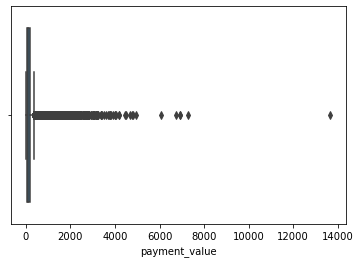

In [10]:
sns.boxplot(x = odeme_sekli["payment_value"]);

**YORUM:** Ortalamları hesapladığımız tabloya baktığımızda ortalama ve standart sapma birbirinden çok uzak değil ve bu durum dağılımın çok çarpık olmadığını gösterir. Ancak 3. kartil ile maksimum değer arasında çok fazla farklılık olması bir aykırı değerler olduğunu ortaya koyuyor ve bunu grafikte çok net görmekteyiz. Bazı ürünler ortalamadan çok yüksek fiyatlara sahip. 

In [15]:
#Aykırı değerleri silme

odeme_miktarı = odeme_sekli["payment_value"]

Q1 = odeme_miktarı.quantile(0.25) #değişkenin %25. indexine karşılık gelen değer
Q3 = odeme_miktarı.quantile(0.75) 
IQR = Q3 - Q1 

alt_sinir = Q1 - 1.5 * IQR #alt eşik değeri
ust_sinir = Q3 + 1.5 * IQR 

aykırı_deger = (odeme_miktarı < alt_sinir) | (odeme_miktarı > ust_sinir)
odeme = odeme_miktarı[~(aykırı_deger)]

#Ortalama İle doldurma

odeme_miktarı[aykırı_deger] = odeme_miktarı.mean()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_150692/1774323744.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odeme_miktarı[aykırı_deger] = odeme_miktarı.mean()


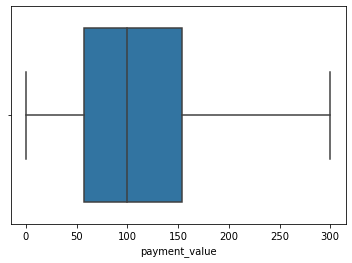

In [16]:
sns.boxplot(x = odeme_sekli["payment_value"]);

In [17]:
odeme_sekli.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_value,103886.0,108.979127,63.854576,0.0,56.79,100.0,154.10038,300.06


**Yorum:** Aykırı gözlemleri, ortalama ile doldurarak ortadan kaldırmış olduk. Sonuçta 3. kartil ile maksimum değer arasındaki fark daha normal olmuş ve daha gerçeğe yakın ortalama değeri hesaplanmış oldu. 

### **ANALİZ 2**

In [18]:
df = pd.merge(siparisler, odeme_sekli, on = "order_id")

eyalet_odemeleri = pd.merge(df,musteri_bilgileri)

eyalet_odemeleri.head()

,order_id,customer_id,payment_type,payment_value,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,credit_card,18.12,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,2.00,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,18.59,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,boleto,141.46,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,credit_card,179.12,GO


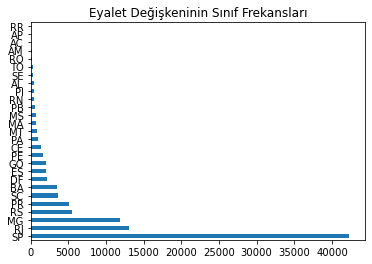

In [19]:
(eyalet_odemeleri["customer_state"]
                  .value_counts()
                  .plot.barh()
                  .set_title("Eyalet Değişkeninin Sınıf Frekansları"));

In [25]:
eyalet_odemeleri.groupby("customer_state").aggregate("mean")

,payment_value
customer_state,
AC,137.718348
AL,129.069069
AM,118.845577
AP,144.206727
BA,114.004095
CE,121.658722
DF,113.245697
ES,112.516208
GO,114.299799


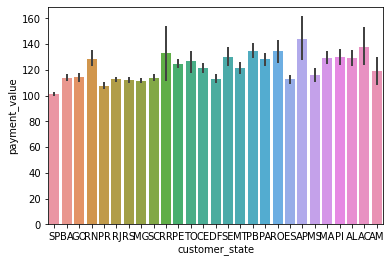

In [26]:
(sns.barplot(x = "customer_state",
             y = "payment_value",
             errwidth = 2.0,
             data = eyalet_odemeleri));

**Yorum:** Ürünler satışında ortalama olarak en fazla ödeme yapan eyalet AP iken, en az ödeme gerçekleştiren eyalet SP dir. Sp eyaletinden daha fazla sipariş verildiği halde ortalamanın daha düşük olması genellikle düşük ücretli ürünlerin sipariş edildiği bilgisini sunar. Halkı daha fakir olabilir bilgisini çıkarabiliriz. 

### **ANALİZ 3**

In [28]:
odeme_sekli.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


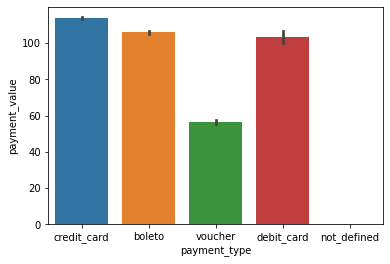

In [29]:
(sns.barplot(x = "payment_type",
             y = "payment_value", 
             data = odeme_sekli));

**Yorum:** Görüldüğü gibi en fazla miktarda ödeme kredi kartı ile yapılmışken en az miktarda ödeme voucher ile yapılmıştır. 

### **ANALİZ 4**

In [30]:
ozellik_func(siparis_edilen_urun_bilgileri)


------------------------------------------SHAPE------------------------------------------
(112650, 5)
------------------------------------------TYPE-------------------------------------------
order_id          object
order_item_id      int64
product_id        object
price            float64
freight_value    float64
dtype: object
------------------------------------------HEAD-------------------------------------------
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id   price  freight_value  
0  4244733e06e7ecb4970a6e2683c13e61   58.90          13.29  
1  e5f2d52b802189ee658865ca93d83a8f  239.90          19.93  
2  c777355d18b72b67abbeef9df44fd0fd  199.00          17.87  
3  7634da1

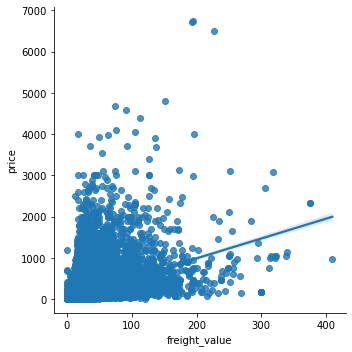

In [31]:
(sns.lmplot(x="freight_value", 
           y="price", 
           data = siparis_edilen_urun_bilgileri ));

**Yorum:** Grafikte eğim düşük çıktı noktaların dağılımlarına baktığımız zaman doğrusal bir dağılım görmüyoruz. 

Anlaşılacağı gibi ürünün kargo ücreti fiyata pek bağlı değil. Ürünün ağırlığı veya satıcı/alıcı eyaletleri arası mesafe etkili olabilir. 